# Predicting Loan Repayment

Lending Club is a website that allows investors to make peer-to-peer loans. This project will use data taken from loans approved between 2007 and 2011 to develop a model that predicts on-time loan repayment.

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
df = pd.read_csv('loans_2007.csv')

/home/annahcasey/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [304]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
df = df[:-2]

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42536 non-null  object 
 1   member_id                   42535 non-null  float64
 2   loan_amnt                   42535 non-null  float64
 3   funded_amnt                 42535 non-null  float64
 4   funded_amnt_inv             42535 non-null  float64
 5   term                        42535 non-null  object 
 6   int_rate                    42535 non-null  object 
 7   installment                 42535 non-null  float64
 8   grade                       42535 non-null  object 
 9   sub_grade                   42535 non-null  object 
 10  emp_title                   39909 non-null  object 
 11  emp_length                  41423 non-null  object 
 12  home_ownership              42535 non-null  object 
 13  annual_inc                  425

## Data Cleaning

The data dictionary containing explanations for each column can be found here: https://docs.google.com/spreadsheets/d/191B2yJ4H1ZPXq0_ByhUgWMFZOYem5jFz0Y3by_7YBY4/edit#gid=2081333097

We'll go through this dictionary, drop any columns that can't contribute to our model, and clean up the remaining columns.

In [307]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

The columns 'id' and 'member_id' are arbitrary ID numbers for the loan and borrower respectively. They won't be helpful for us, and we can drop them.

In [308]:
cols_to_drop = ['id', 'member_id']

The next column, 'loan_amnt', lists the amount of the loan. This will be a crucial column for us, so we should make sure it's clean.

In [309]:
df['loan_amnt'].value_counts(dropna=False)

10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
           ... 
4675.0        1
17975.0       1
14625.0       1
29300.0       1
NaN           1
Name: loan_amnt, Length: 899, dtype: int64

In [310]:
df[df['loan_amnt'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have a missing value, but it's for a row we should drop.

In [311]:
df.dropna(subset=['member_id'], axis=0, inplace=True)

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now we can check the distribution plot and boxplot to see if anything stands out

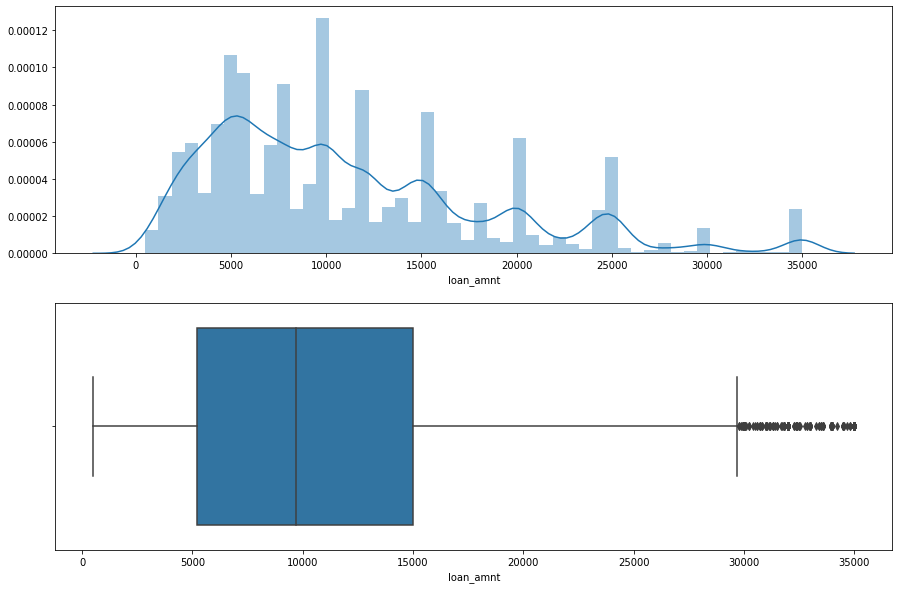

In [312]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
sns.distplot(df['loan_amnt'], ax=ax[0])
sns.boxplot(df['loan_amnt'], ax=ax[1])

Nothing seems off. We can move to 'funded_amnt', which lists the amount of the loan that was funded. However, this is not info we would have access to when deciding to make a loan. We can drop it. The same can be said of 'funded_amnt_inv'.

In [313]:
cols_to_drop.append('funded_amnt')
cols_to_drop.append('funded_amnt_inv')

The 'term' column indicates whether the loan will be paid back over the course of 36 or 60 months.

In [314]:
df['term'].value_counts(dropna=False)

 36 months    31534
 60 months    11001
Name: term, dtype: int64

We'll just take out "months" and convert it to an integer type. 

In [315]:
#creates a column containing just the integer and appends the old column to our drop list
df['term_mos'] = df['term'].str.replace(r' months','').astype(int)
cols_to_drop.append('term')

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The 'int_rate' column indicates the interest rate on the loan.

In [316]:
df['int_rate'].value_counts(dropna=False)

 10.99%    970
 11.49%    837
 13.49%    832
  7.51%    787
  7.88%    742
          ... 
 17.46%      1
 24.59%      1
 24.40%      1
 16.20%      1
 17.44%      1
Name: int_rate, Length: 394, dtype: int64

This column will be more useful to us as a float type.

In [317]:
df['int_rate_pct'] = df['int_rate'].str.replace(r'%','').astype(float)
cols_to_drop.append('int_rate')

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


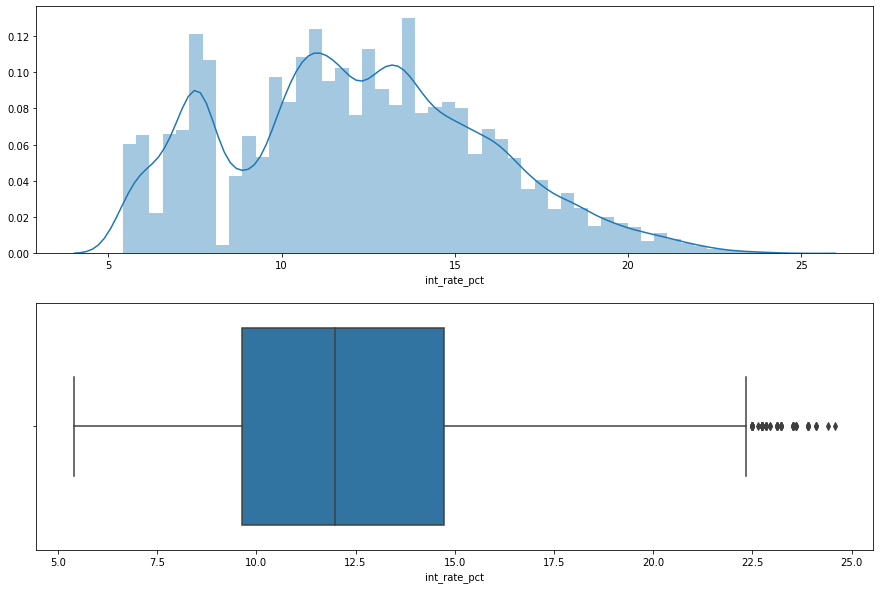

In [318]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
sns.distplot(df['int_rate_pct'], ax=ax[0])
sns.boxplot(df['int_rate_pct'], ax=ax[1])

Aside from an anomalous dip at around 8%, everything else looks as expected. Could be a multimodal distribution as indicated by the KDE, with low-risk loans clustering around 7.5%, medium-risk clustering around 11%, and higher-risk around 13%.

Our 'installment' column indicates the monthly payment made by the borrower. 

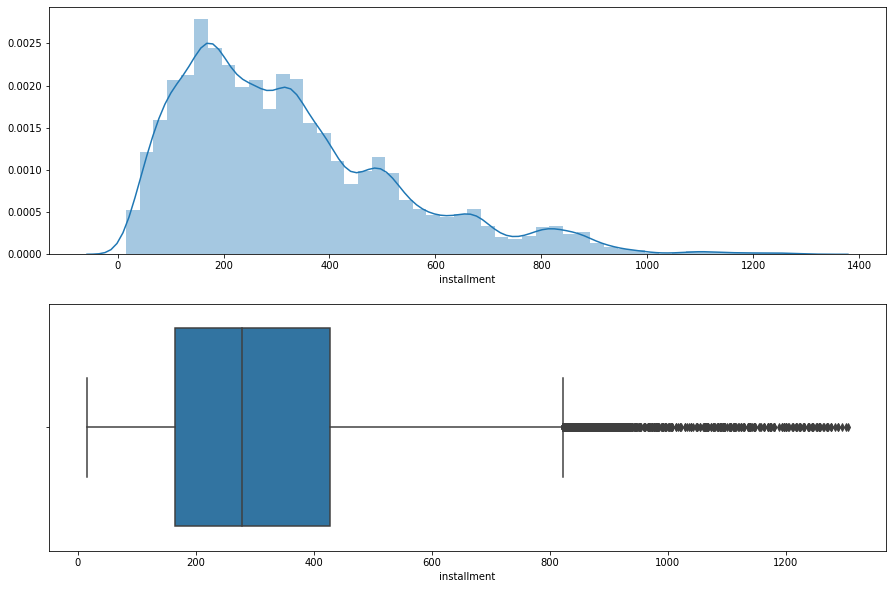

In [319]:
fig, ax = plt.subplots(nrows=2, figsize=(15,10))
sns.distplot(df['installment'], ax=ax[0])
sns.boxplot(df['installment'], ax=ax[1])

The 'grade' column assigns a grade to the loan based on borrower's credit history, collateral, application, etc. The 'sub_grade' column further breaks down these categories. Both, however, likely have a lot of overlap with "int_rate_pct" which is also assigned based on loan risk. We should probably drop the categorical variables "grade" and "sub_grade" since a continuous variable like "int_rate_pct" is going to be more useful for our model. Before we do, though, let's confirm that they're basically the same information with some boxplots.

In [320]:
df['grade'].value_counts(dropna=False)

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [321]:
df['sub_grade'].value_counts(dropna=False)

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

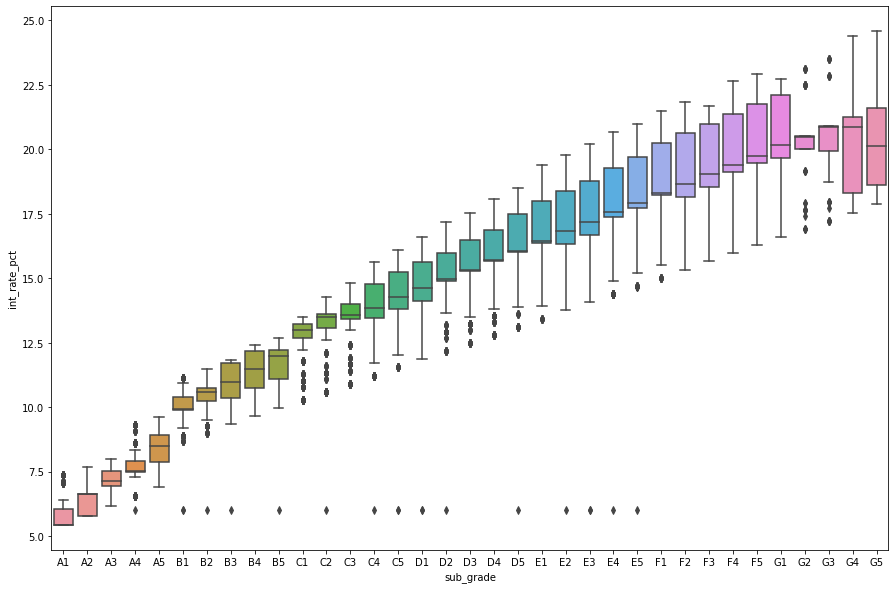

In [322]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="sub_grade", y="int_rate_pct", data=df.sort_values('sub_grade'))

In [323]:
df.groupby('grade')['int_rate_pct'].mean()

grade
A     7.342708
B    11.014209
C    13.499889
D    15.577149
E    17.376768
F    19.265304
G    20.451250
Name: int_rate_pct, dtype: float64

Just by looking at the boxplots, we can tell that int_rate_pct strongly correlates with "sub_grade." We'll add "grade" and "sub_grade" to our columns to drop.

In [324]:
cols_to_drop.append('grade')
cols_to_drop.append('sub_grade')

The "emp_title" column contains the employer title supplied by the borrower on their application.

In [325]:
df['emp_title'].str.upper().value_counts(dropna=False)

NaN                             2626
US ARMY                          219
BANK OF AMERICA                  145
WALMART                           84
AT&T                              81
                                ... 
CITY OF ALBUQUERQUE                1
ISABELLA GERIATRIC CENTER          1
CURATED                            1
SOUTH STREET SEAPORTM MUSEUM       1
CRISPIN PORTER + BOGUSKY           1
Name: emp_title, Length: 29170, dtype: int64

With over 29,000 different values, and the most common being "NaN", this column is too messy to be of much use to us. Let's drop it.

In [326]:
cols_to_drop.append('emp_title')

The "emp_length" column indicates the reported number of years of employment. Because anything 10 years or over is lumped into one category, I think it's best we treat this as categorical and dummy-code it, rather than converting it to an integer type. 

In [327]:
df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534     < 1 year
42535    10+ years
Name: emp_length, Length: 42535, dtype: object

The column "home_ownership" indicates whether the borrower rents, owns, or has a mortgage. 

In [328]:
df['home_ownership'].value_counts(dropna=False)

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

The column "annual_inc" contains the annual income provided by the borrower when they registered as a member. This column will likely be very useful to our model, but we should look for any significant outliers, which could indicate fabrication.

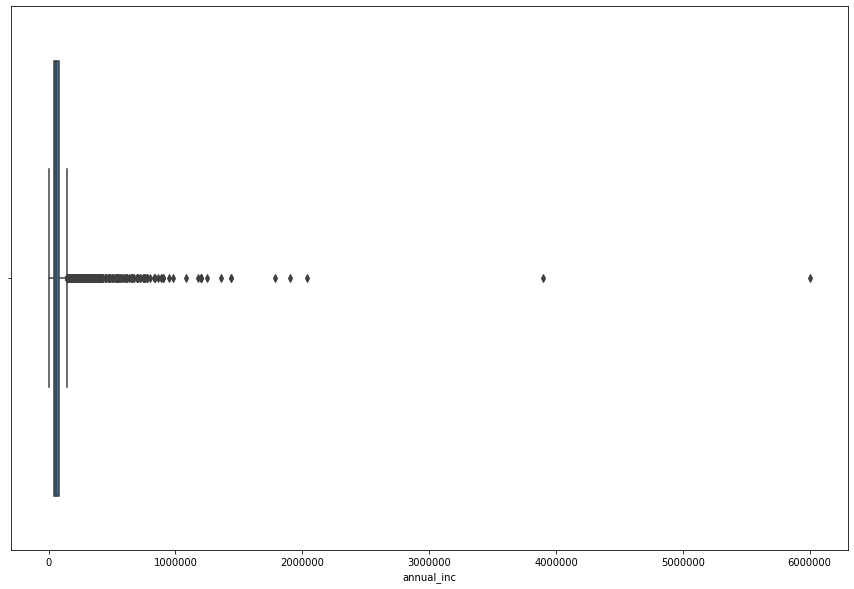

In [329]:
plt.figure(figsize=(15,10))
sns.boxplot(df['annual_inc'])

In [330]:
df['annual_inc'].median()

59000.0

In 2018, the US Census Bureau reported that the median annual income of a US worker was a little over $33,000. From 2007-2011, this number was even lower. Likely, we have some misreporting of income here. This would make sense given that a borrower with a higher income would be more likely to be given a loan. Fortunately, our data contains a column indicating whether the reported income was verified by Lending Club.

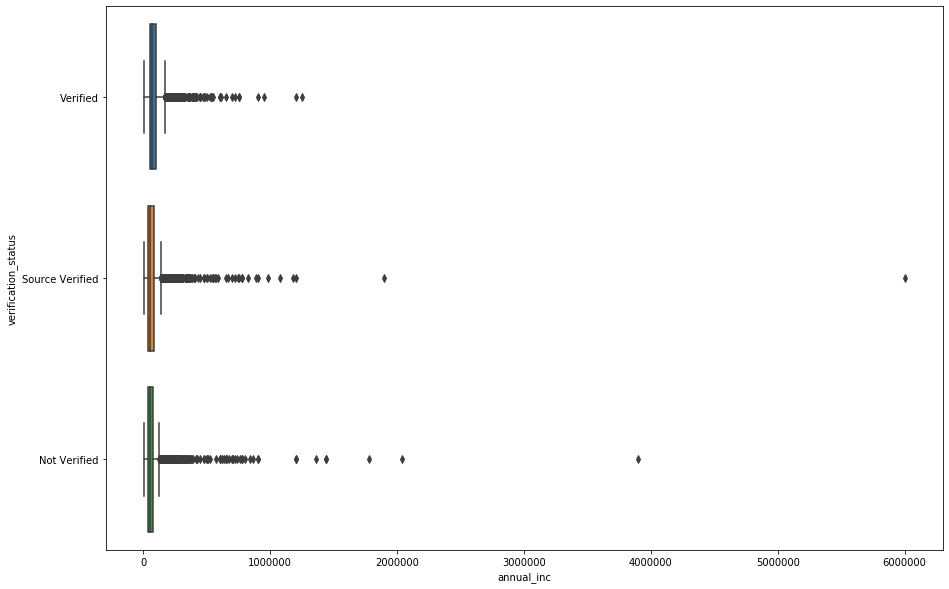

In [331]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=df['annual_inc'], y=df['verification_status'])

We can see by looking at the boxplots that we have a larger spread and more outliers in our "Source Verified" (meaning only the income source, not amount, was verified) and "Not Verified" categories than we do in our "Verified" rows. There's some interesting info to be gleaned here. We can create two more columns and decide during our feature selection process which ones are worth saving: 1) a column which replaces any non-"Verified" rows more than our upper-limit with a random "Verified" value, and 2) a column which contains a boolean indicating whether the reported income was likely fabricated. A column which indicates trustworthiness of the information provided by the borrower may end up being important for our model. 

In [332]:
IQR = df['annual_inc'].quantile(0.75) - df['annual_inc'].quantile(0.25)
upper_thresh = df['annual_inc'].quantile(0.75) + (IQR * 1.5)

In [334]:
"""Creates a column that contains a 1 if the verification status is not 'Verified' 
and the reported income is higher than our upper-limit."""
df['possible_fabricator'] = df.apply(lambda x: 1 
                                     if ((x['verification_status'] != 'Verified') and 
                                         (x['annual_inc'] > upper_thresh)) 
                                     else 0, axis=1)

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [370]:
"""Creates a column that replaces unverified incomes larger than their 
upper-limit with a randomly chosen verified income."""

df['clean_inc'] = df.apply(lambda x: 
                           df[df['verification_status']=='Verified']['annual_inc'].sample(n=1).values[0] 
                           if (x['possible_fabricator'] == 1)
                           else x['annual_inc'], axis=1)

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [335]:
df['possible_fabricator'].value_counts()

0    41535
1     1000
Name: possible_fabricator, dtype: int64

The 'issue_d' column indicates the month the loan was funded, but this data leaks from the future. We wouldn't know what month the loan was funded when deciding whether to fund a loan, so we'll drop it.

In [336]:
cols_to_drop.append('issue_d')

The 'loan_status' column contains the current status of the loan. 

In [337]:
df['loan_status'].value_counts(dropna=False)

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

As a feature, this data would certainly be leaking from the future, but it might make a good target for our model. For now, we'll set it as the target and we can change the variable if something better comes along.

In [338]:
target = df['loan_status']

Contained within the "pymnt_plan" column is information about whether a payment plan has been put in place for the loan. 

In [339]:
df['pymnt_plan'].value_counts(dropna=False)

n    42534
y        1
Name: pymnt_plan, dtype: int64

Given the high homogeneity of this column, it's safe to say it won't be useful to our model.

In [340]:
cols_to_drop.append('pymnt_plan')

Subjects assign a category to the reason for the loan in the "purpose" column.

In [341]:
df['purpose'].value_counts(dropna=False)

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

We'll need to dummy-code the categories, but otherwise the column is ready.

The 'title' column provides the loan title that the borrower assigned to the loan.

In [342]:
df['title'].value_counts(dropna=False)

Debt Consolidation                                                      2259
Debt Consolidation Loan                                                 1760
Personal Loan                                                            708
Consolidation                                                            547
debt consolidation                                                       532
                                                                        ... 
Project Tope                                                               1
2400 Loan                                                                  1
Excellent Credit- New Product Development for Fast-Growing Business        1
Getting Rid of High interest Credit cards                                  1
Keeping my girlfriend from going bankrut from a few thousand dollars       1
Name: title, Length: 21265, dtype: int64

This column is messy and contains far too many different values and even different kinds of information. We can't use it, so we'll drop it.

In [343]:
cols_to_drop.append('title')

The 'zip_code' column contains the first three digits of the borrower's zip code, which gives us some information about what region they live in. We should keep it, but ensure that it's a string and not an integer so that our model doesn't treat it as numerical. 

In [344]:
df['zip_code'].value_counts(dropna=False)

100xx    649
945xx    559
606xx    548
112xx    538
070xx    503
        ... 
044xx      1
831xx      1
595xx      1
386xx      1
884xx      1
Name: zip_code, Length: 837, dtype: int64

In [345]:
df['zip_code'].dtype

dtype('O')

Our 'addr_state' column gives us the state the borrower provided with their application, but this is the same information as 'zip_code', but with less categories. We'll drop it.

In [346]:
cols_to_drop.append('addr_state')

The 'dti' column indicates the borrower's debt-to-income ratio, not including mortgages. 

In [347]:
df['dti'].dtype

dtype('float64')

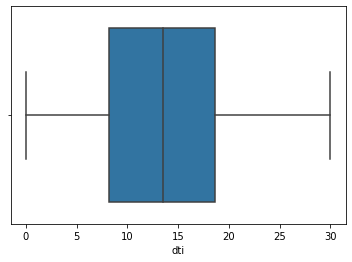

In [348]:
sns.boxplot(df['dti'])

In [349]:
df['dti'].value_counts(dropna=False, bins=5)

(11.996, 17.994]    12451
(5.998, 11.996]     11142
(17.994, 23.992]     9918
(-0.031, 5.998]      6977
(23.992, 29.99]      2047
Name: dti, dtype: int64

Because this number is calculated using the reported income, we have a similar issue as with 'annual_inc'-- we don't know how accurate the number is because income could be fabricated. Let's break it out by whether income was verified like we did with 'annual_inc'.

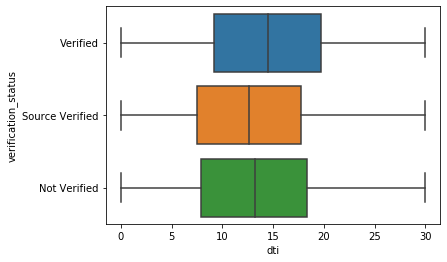

In [350]:
sns.boxplot(x='dti', y='verification_status', data=df)

Unlike with 'annual_inc', these are reasonably similar enough to each other that we likely don't need to fuss with the column too much. Let's also look at our newly-created 'possible_fabricator' column.

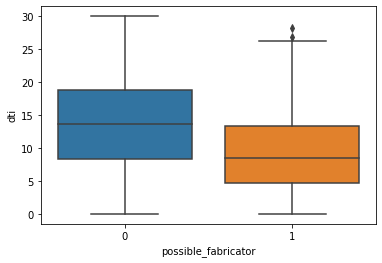

In [351]:
sns.boxplot(y=df['dti'], x=df['possible_fabricator'])

Our possible fabricators do appear to have noticeably lower debt-to-income ratios, which is what we would expect if they were fudging their income. We'll handle this, the same way we did with 'annual_inc', by replacing the 1000 potentially fabricated dtis with a random, verified dti. 

In [373]:
df['clean_dti'] = df.apply(lambda x: 
                           df[df['verification_status']=='Verified']['dti'].sample(n=1).values[0] 
                           if (x['possible_fabricator'] == 1)
                           else x['dti'], axis=1)

/home/annahcasey/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The column 'delinq_2yrs' lets us know how many 30+-days-past-due incidences are in the borrower's credit file from the past two years. 

In [379]:
df['delinq_2yrs'].value_counts(dropna=False)

0.0     37771
1.0      3595
2.0       771
3.0       244
4.0        72
NaN        29
5.0        27
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [380]:
df['delinq_2yrs'].dtype

dtype('float64')

Our next column of interest is 'application_type.'

In [27]:
df['application_type'].value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

This column has only one value. We can drop it.

In [28]:
cols_to_drop.append('application_type')

In [32]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'clean_inc',
       'possible_fabricator'],
      dtype='object')